In [1]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys

Connecting hanhou@datajoint.mesoscale-activity-map.org:3306


# Migrate my previous code

## Define models

In [ ]:
dj.ERD(foraging_model)

In [ ]:
foraging_model.ModelClass()

In [ ]:
foraging_model.Model.load_models()

In [ ]:
foraging_model.Model & 'is_choice_kernel'

In [ ]:
foraging_model.Model() * foraging_model.Model.Param() & 'model_id=0'

In [ ]:
foraging_model.FittedSessionModel.key_source

## Prepare data for each session

In [ ]:
dj.ERD(experiment.BehaviorTrial) +2

In [ ]:
dj.ERD(experiment.WaterPort)+1 + dj.ERD(experiment.SessionBlock) 

In [ ]:
key = {'subject_id': 447921, 'session': 3, 'model_id': 5}
experiment.WaterPortChoice.proj(choice='water_port') * experiment.BehaviorTrial.proj('outcome', 'early_lick') * \
experiment.SessionBlock.BlockTrial & key

## Populate model fitting

In [11]:
schema = dj.schema(get_schema_name('foraging_model'))
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__fitted_session_model,10b6320397e32be392354d5621193407,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,houh-ww1,35708,115504,2021-07-26 18:35:52
__fitted_session_model,17ad3d475d6507755cf8723ac513784d,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,houh-ww1,39332,115488,2021-07-26 18:34:23
__fitted_session_model,2a3d379e7590eea64431c7d4a787475e,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,houh-ww1,44912,115503,2021-07-26 18:30:54
__fitted_session_model,37741de88545da0056d5b429505c1a6c,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,epyhs3B,110260,115525,2021-07-26 18:35:33
__fitted_session_model,3fef777ce3e90746687c33dc2a28aee3,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,epyhs3B,114884,115519,2021-07-26 18:33:07
__fitted_session_model,40923ce349853a00f2ff95e0c6aeb3a8,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,epyhs3B,114532,115521,2021-07-26 18:30:32
__fitted_session_model,4b3ee71663f0374ed9e7b83b5e8384fc,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,houh-ww1,45972,115485,2021-07-26 18:34:16
__fitted_session_model,4f2432972af96c00765fb59e8256a30a,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,houh-ww1,50500,115501,2021-07-26 18:34:12
__fitted_session_model,5d20e9eaf0a57eb1f05ee99889b7b873,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,epyhs3B,110500,115530,2021-07-26 18:32:52
__fitted_session_model,5f5fbed202d2db50faf48a88e29a7276,reserved,=BLOB=,,=BLOB=,hanhou@206.241.0.254,epyhs3B,114972,115532,2021-07-26 18:35:26


In [ ]:
schema.jobs.fetch('key', 'host')

In [ ]:
schema.jobs.delete()

In [11]:
finished = len(foraging_model.FittedSessionModel())
total = len(foraging_model.FittedSessionModel.key_source)
print(f'Fitted session: {finished}/{total}, {finished/total:.2%}')

Fitted session: 9702/19030, 50.98%


In [ ]:
foraging_model.FittedSessionModel()

Overall statistics for all models

In [ ]:
foraging_model.Model.proj('model_notation') * (foraging_model.Model.aggr(foraging_model.FittedSessionModel, aver_lpt_aic='avg(lpt_aic)', aver_lpt_bic='avg(lpt_bic)', n='count(*)'))

In [ ]:
dj.U('subject_id','session').aggr(foraging_model.FittedSessionModel, max_lpt_aic='max(lpt_aic)')

## Populate model comparison

In [2]:
foraging_model.FittedSessionModelComparison.populate(display_progress=True, order='random')

FittedSessionModelComparison: 100%|██████████████████████████████████████████████████████████████████| 2451/2451 [00:52<00:00, 46.82it/s]


In [3]:
foraging_model.FittedSessionModelComparison.populate(display_progress=True, order='random')

FittedSessionModelComparison: 100%|██████████████████████████████████████████████████████████████████| 2450/2450 [01:07<00:00, 36.15it/s]


# Model comparison

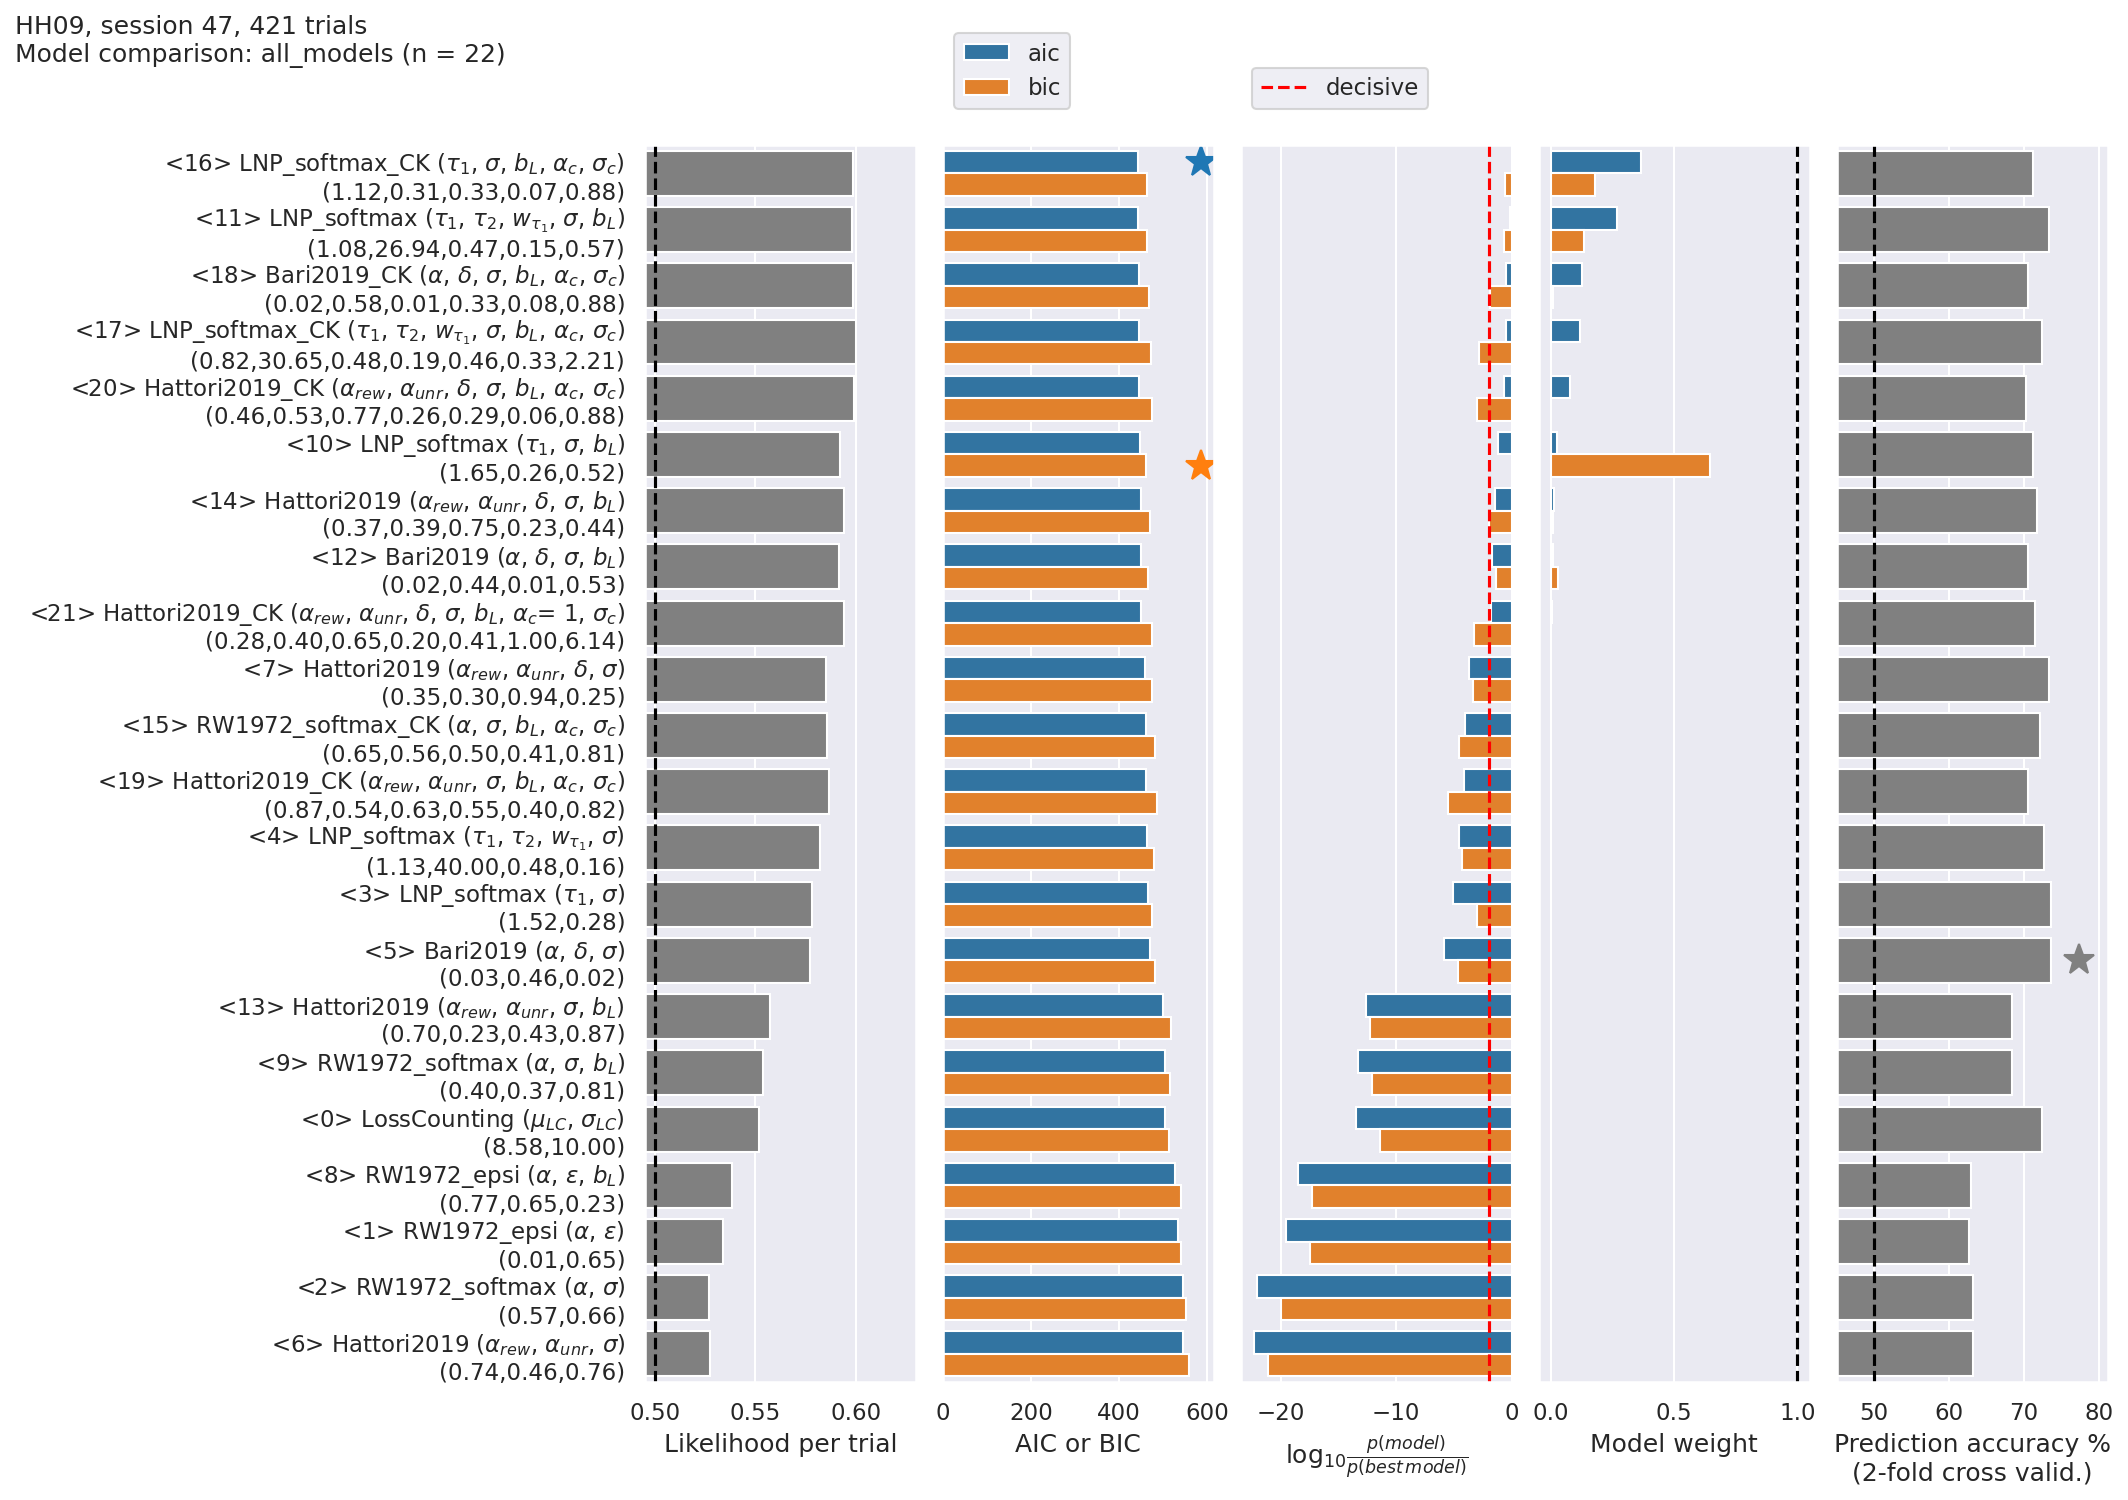

In [9]:
from pipeline.plot.foraging_model_plot import plot_session_model_comparison
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")
plot_session_model_comparison(unit_key, model_comparison_idx=0, sort='aic')